##  Project Assignment - Specialist Certificate in Data Analytics Essentials- Robbie Pratt 


#### Import Python Packages

In [597]:
import pandas as pd
import re
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import matplotlib.pylab as plt
import matplotlib
import seaborn as sns

#### Web Scraping - Is in the complimentary notebook

#### Import a CSV file into a Pandas DataFrame

In [598]:
df_BestBooks=pd.read_csv('BestBooks.csv')
df_BestBooks.head(3)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN


#### View Data

In [599]:
print(df_BestBooks.shape)

(52478, 25)


#### Find missing (null) values in the dataset

In [600]:
null = df_BestBooks.isna().sum()
print("Number of null values in the dataset: ", null)

Number of null values in the dataset:  bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64


### Dropping unwanted columns

In [601]:
df_BestBooks = df_BestBooks.drop(columns = ['series', 'description', 'language', 'bookFormat',  'edition', 
                                            'pages', 'publisher', 'publishDate', 'firstPublishDate', 'coverImg'])

In [602]:
null = df_BestBooks.isnull().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId                0
title                 0
author                0
rating                0
isbn                  0
genres                0
characters            0
awards                0
numRatings            0
ratingsByStars        0
likedPercent        622
setting               0
bbeScore              0
bbeVotes              0
price             14365
dtype: int64


In [603]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...","['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN


### Drop rows with missing "price" and "likedPercent" 

In [604]:
df_BestBooks.dropna(axis=0, inplace=True)

In [605]:
null = df_BestBooks.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId            0
title             0
author            0
rating            0
isbn              0
genres            0
characters        0
awards            0
numRatings        0
ratingsByStars    0
likedPercent      0
setting           0
bbeScore          0
bbeVotes          0
price             0
dtype: int64


In [606]:
print(df_BestBooks.shape)

(37901, 15)


In [607]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


### Merging - Is in the complimentary notebook for Merging

### Iterators - Is in the complimentary notebook for Web-scraping

### Lists / RegEx

### Awards column is in a list format, convert to string and count awards

In [608]:
df_BestBooks ['awards'] = df_BestBooks['awards'].str.replace(r'\W',"", regex=True)

In [609]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


In [610]:
df_BestBooks['awards']

0        LocusAwardNomineeforBestYoungAdultBook2009Geor...
1        BramStokerAwardforWorksforYoungReaders2003Anth...
4        GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...
5        NationalJewishBookAwardforChildrensandYoungAdu...
6        PrometheusHallofFameAward2011RetroHugoAwardfor...
                               ...                        
52470    HOLTMedallionbyVirginiaRomanceWritersNomineefo...
52472                                                     
52475                         ReadersFavoriteBookAward2011
52476                                                     
52477                                                     
Name: awards, Length: 37901, dtype: object

In [611]:
df_BestBooks['Award_Count'] = df_BestBooks['awards'].apply(lambda n: len(n.split(',')))

In [612]:
df_BestBooks['Award_Count']

0        1
1        1
4        1
5        1
6        1
        ..
52470    1
52472    1
52475    1
52476    1
52477    1
Name: Award_Count, Length: 37901, dtype: int64

In [613]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,1
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,1
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,1


### RegEx - Further example is in the complimentary notebook forRegEx

### Split genres column (list) into string. 

In [614]:
split_genre = df_BestBooks['genres'].str.split(',',n=1,expand=True)
split_genre.rename(columns={0:'new_genre',1:'restof_genre'})

,new_genre,restof_genre
0,['Young Adult',"'Fiction', 'Dystopia', 'Fantasy', 'Science Fi..."
1,['Fantasy',"'Young Adult', 'Fiction', 'Magic', 'Childrens..."
4,['Young Adult',"'Fantasy', 'Romance', 'Vampires', 'Fiction', ..."
5,['Historical Fiction',"'Fiction', 'Young Adult', 'Historical', 'Clas..."
6,['Classics',"'Fiction', 'Dystopia', 'Fantasy', 'Literature..."
...,...,...
52470,['Christian Fiction',"'Christian', 'Suspense', 'Romance', 'Mystery'..."
52472,['Romance',"'Young Adult', 'Contemporary', 'Contemporary ..."
52475,['Fantasy',"'Young Adult', 'Paranormal', 'Angels', 'Roman..."
52476,['Fiction',"'Mystery', 'Historical Fiction', 'Adventure',..."


In [615]:
df_BestBooks[['new_genre','restof_genre']]= df_BestBooks['genres'].str.split(',',n=1,expand=True)

In [616]:
df_BestBooks

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,restof_genre
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,1,['Young Adult',"'Fiction', 'Dystopia', 'Fantasy', 'Science Fi..."
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,1,['Fantasy',"'Young Adult', 'Fiction', 'Magic', 'Childrens..."
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,1,['Young Adult',"'Fantasy', 'Romance', 'Vampires', 'Fiction', ..."
5,19063.The_Book_Thief,The Book Thief,Markus Zusak (Goodreads Author),4.37,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",NationalJewishBookAwardforChildrensandYoungAdu...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",1372809,14168,3.8,1,['Historical Fiction',"'Fiction', 'Young Adult', 'Historical', 'Clas..."
6,170448.Animal_Farm,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",PrometheusHallofFameAward2011RetroHugoAwardfor...,2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",1276599,13264,4.42,1,['Classics',"'Fiction', 'Dystopia', 'Fantasy', 'Literature..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,11115191-attracted-to-fire,Attracted to Fire,DiAnn Mills (Goodreads Author),4.14,9781414348643,"['Christian Fiction', 'Christian', 'Suspense',...",[],HOLTMedallionbyVirginiaRomanceWritersNomineefo...,2143,"['945', '716', '365', '78', '39']",95.0,['West Texas (United States)'],0,1,5.55,1,['Christian Fiction',"'Christian', 'Suspense', 'Romance', 'Mystery'..."
52472,12395883-unbelievable,Unbelievable,Sherry Gammon (Goodreads Author),4.16,9781477594247,"['Romance', 'Young Adult', 'Contemporary', 'Co...",[],,1028,"['442', '384', '142', '48', '12']",94.0,"['Port Fare, New York (United States)']",0,1,19.18,1,['Romance',"'Young Adult', 'Contemporary', 'Contemporary ..."
52475,10815662-marked,Marked,Kim Richardson (Goodreads Author),3.70,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],ReadersFavoriteBookAward2011,6674,"['2109', '1868', '1660', '647', '390']",84.0,[],0,1,7.37,1,['Fantasy',"'Young Adult', 'Paranormal', 'Angels', 'Roman..."
52476,11330278-wayward-son,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],,238,"['77', '78', '59', '19', '5']",90.0,[],0,1,2.86,1,['Fiction',"'Mystery', 'Historical Fiction', 'Adventure',..."


### Remove special characters

In [617]:
df_BestBooks ['new_genre'] = df_BestBooks['new_genre'].str.replace(r'\W',"",regex=True)

In [618]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,restof_genre
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,1,YoungAdult,"'Fiction', 'Dystopia', 'Fantasy', 'Science Fi..."
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,1,Fantasy,"'Young Adult', 'Fiction', 'Magic', 'Childrens..."
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,1,YoungAdult,"'Fantasy', 'Romance', 'Vampires', 'Fiction', ..."


In [619]:
df_BestBooks = df_BestBooks.drop(columns = ['restof_genre'])

In [620]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,1,YoungAdult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,1,Fantasy
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,1,YoungAdult


### Define a customer function to create reusable code

### Checking for Errors in column rating

In [621]:
df_BestBooks.loc[df_BestBooks["rating"]<= 5, "Error_rating"] = "No_Error"
df_BestBooks.loc[df_BestBooks["rating"]> 5, "Error_rating"] = "Error"
df_BestBooks.loc[df_BestBooks["rating"]< 0, "Error_rating"] = "Error"
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,Error_rating
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,1,YoungAdult,No_Error
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,1,Fantasy,No_Error
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,1,YoungAdult,No_Error


In [622]:
if 'Error' in df_BestBooks.Error_rating :
    print("\nThis value exists in the Dataframe")
 
else :
    print("\nThis value does not exist in the Dataframe")

print(df_BestBooks['Error_rating'].value_counts()['No_Error'])


This value does not exist in the Dataframe
37901


### Checking for errors in column likedPercent

In [623]:
df_BestBooks.loc[df_BestBooks["likedPercent"]<= 100, "Error_percentage"] = "No_Error"
df_BestBooks.loc[df_BestBooks["likedPercent"]> 100, "Error_percentage"] = "Error"
df_BestBooks.loc[df_BestBooks["likedPercent"]< 0, "Error_percentage"] = "Error"

if 'Error' in df_BestBooks.Error_percentage :
    print("\nThis value exists in the Dataframe")
 
else :
    print("\nThis value does not exist in the Dataframe")

print(df_BestBooks['Error_percentage'].value_counts()['No_Error'])


This value does not exist in the Dataframe
37901


In [624]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,Error_rating,Error_percentage
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",LocusAwardNomineeforBestYoungAdultBook2009Geor...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,1,YoungAdult,No_Error,No_Error
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",BramStokerAwardforWorksforYoungReaders2003Anth...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,1,Fantasy,No_Error,No_Error
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",GeorgiaPeachBookAward2007BuxtehuderBulle2006Ke...,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,1,YoungAdult,No_Error,No_Error


### NumPy

In [625]:
df_BestBooks.describe(include=(np.number))

,rating,numRatings,likedPercent,bbeScore,bbeVotes,Award_Count
count,37901.000000,3.790100e+04,37901.000000,3.790100e+04,37901.000000,37901.0
mean,3.998219,1.944083e+04,92.299755,1.950290e+03,22.388591,1.0
std,0.301866,9.496797e+04,5.437769,3.375958e+04,354.417035,0.0
min,1.000000,1.000000e+00,0.000000,0.000000e+00,-4.000000,1.0
25%,3.810000,6.720000e+02,90.000000,8.300000e+01,1.000000,1.0
50%,4.010000,3.259000e+03,94.000000,9.800000e+01,1.000000,1.0
75%,4.190000,1.172500e+04,96.000000,1.960000e+02,3.000000,1.0
max,5.000000,6.376780e+06,100.000000,2.993816e+06,30516.000000,1.0


### Visualisations & Relationships

### Correlation Heat Map

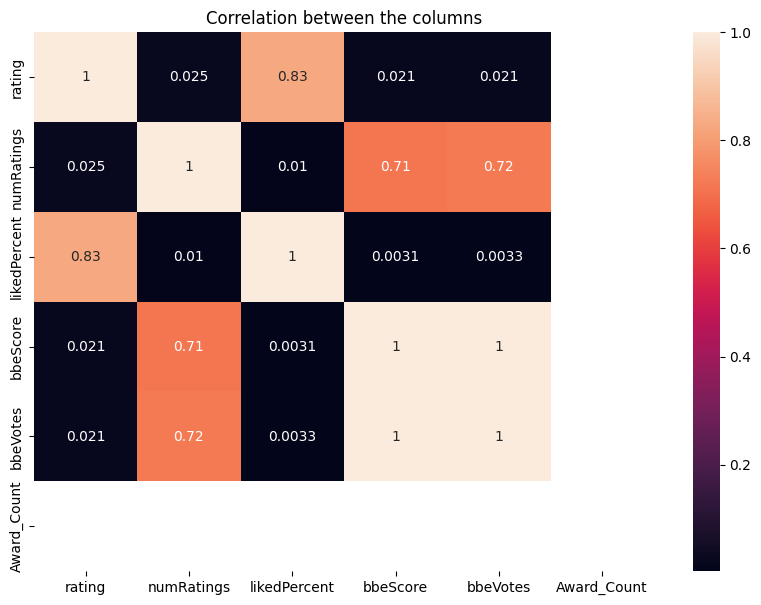

In [626]:
plt.figure(figsize=(10,7))
sns.heatmap(df_BestBooks.corr(numeric_only =[False]), annot=True)
plt.title ('Correlation between the columns')
plt.show(close=None, block=None) 

### Seaborn Pair-plot

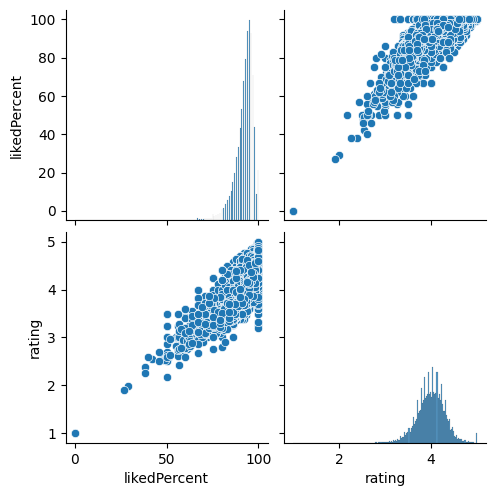

In [627]:
Z = sns.pairplot(df_BestBooks, vars=["likedPercent", "rating"])

### Machine Learning  -Linear Regression Model - Supervised Learning

Data types

In [628]:
print(df_BestBooks.likedPercent.dtypes)   
print(df_BestBooks.rating.dtypes)  

float64
float64


Define x and y

In [629]:
X = df_BestBooks['rating'].values
y = df_BestBooks['likedPercent'].values

In [630]:
X

array([4.33, 4.5 , 3.6 , ..., 3.7 , 3.85, 4.02])

In [631]:
y

array([96., 98., 78., ..., 84., 90., 90.])

Reshapping X and y

In [632]:
X = X.reshape(-1,1)
y = y.reshape (-1,1)

In [633]:
X

array([[4.33],
       [4.5 ],
       [3.6 ],
       ...,
       [3.7 ],
       [3.85],
       [4.02]])

In [634]:
y

array([[96.],
       [98.],
       [78.],
       ...,
       [84.],
       [90.],
       [90.]])

Split the dataset into training data and testing data - 70/30

In [635]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [636]:
X_train,X_test,y_train,y_test

(array([[4.13],
        [3.95],
        [4.2 ],
        ...,
        [4.  ],
        [4.54],
        [3.88]]),
 array([[3.74],
        [3.57],
        [4.48],
        ...,
        [3.86],
        [4.35],
        [4.22]]),
 array([[96.],
        [93.],
        [95.],
        ...,
        [95.],
        [98.],
        [93.]]),
 array([[90.],
        [84.],
        [98.],
        ...,
        [91.],
        [95.],
        [95.]]))

Use Linear Regression function to train and fit the model

In [637]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Model prediction and test data

In [638]:
y_predict=reg.predict(X_test)
print(y_predict)
print(y_test)

[[88.4543769 ]
 [85.9191496 ]
 [99.4900722 ]
 ...
 [90.24394911]
 [97.55136897]
 [95.61266574]]
[[90.]
 [84.]
 [98.]
 ...
 [91.]
 [95.]
 [95.]]


Calculate the accuracy of the model using reg.score

In [639]:
reg.score(X_test, y_test)

0.6804690764057619

Hyperparamater Tuning - increase the test size to 30%

In [640]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=0)

In [641]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [642]:
y_predict=reg.predict(X_test)
print(y_predict)
print(y_test)

[[88.47564512]
 [85.94970277]
 [99.47092361]
 ...
 [89.0699845 ]
 [86.84121184]
 [95.90488735]]
[[90.]
 [84.]
 [98.]
 ...
 [92.]
 [86.]
 [96.]]


In [643]:
reg.score(X_test, y_test)

0.68504373248925

### Visualisation - Graph (MatPlotLib)

Trained data with predicted trained best fit line

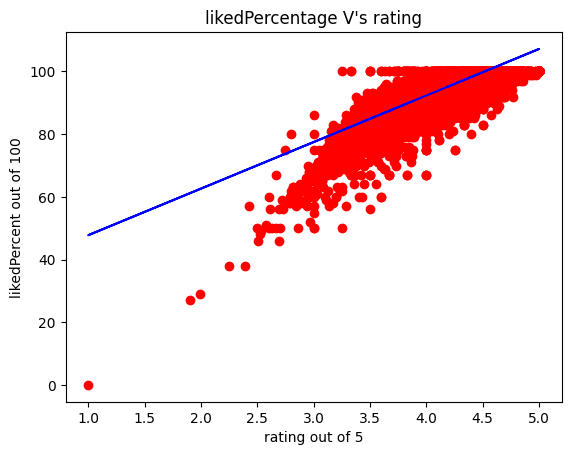

In [644]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("likedPercentage V's rating")
plt.xlabel("rating out of 5")
plt.ylabel("likedPercent out of 100")
plt.show()

Test data with predicted test best fit line

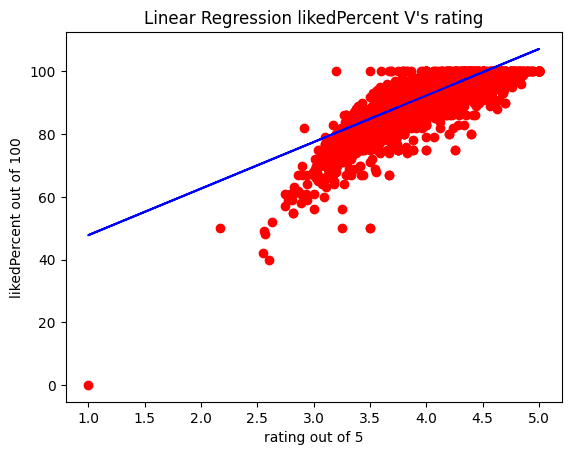

In [645]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,reg.predict(X_test),color='blue')
plt.title("Linear Regression likedPercent V's rating")
plt.xlabel("rating out of 5")
plt.ylabel("likedPercent out of 100")
plt.show()

### Predict a target variable using Decision Tree

Check data types

In [646]:
print(df_BestBooks.likedPercent.dtypes)
print(df_BestBooks.rating.dtypes)
print(df_BestBooks.numRatings.dtypes)
print(df_BestBooks.bbeScore.dtypes)
print(df_BestBooks.bbeVotes.dtypes)

float64
float64
int64
int64
int64


Define the target Variable

In [647]:
Target_Variables = ['rating']
y2 = df_BestBooks[Target_Variables]

In [648]:
y2

,rating
0,4.33
1,4.50
4,3.60
5,4.37
6,3.95
...,...
52470,4.14
52472,4.16
52475,3.70
52476,3.85


Define the predictive Variables

In [649]:
Predictive_Variables = ['likedPercent', 'numRatings', 'bbeScore', 'bbeVotes']
X2 = df_BestBooks[Predictive_Variables]

In [650]:
X2

,likedPercent,numRatings,bbeScore,bbeVotes
0,96.0,6376780,2993816,30516
1,98.0,2507623,2632233,26923
4,78.0,4964519,1459448,14874
5,96.0,1834276,1372809,14168
6,91.0,2740713,1276599,13264
...,...,...,...,...
52470,95.0,2143,0,1
52472,94.0,1028,0,1
52475,84.0,6674,0,1
52476,90.0,238,0,1


Split the data in training and testing 

In [651]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=0)

In [652]:
X2_train, X2_test, y2_train, y2_test

(       likedPercent  numRatings  bbeScore  bbeVotes
 29684          95.0        1219        95         1
 47776          96.0       10757        54         1
 58             89.0     1162638    438548      4912
 32756          97.0        7514        93         1
 9203           96.0        7719       277         3
 ...             ...         ...       ...       ...
 28175          94.0          35        96         1
 44812          97.0        1095        69         1
 42484          95.0         864        76         2
 28949          98.0        5238        96         1
 3378           93.0      164487       983        12
 
 [26530 rows x 4 columns],
        likedPercent  numRatings  bbeScore  bbeVotes
 13551          90.0        2522       183         2
 29457          84.0         452        95         1
 842            98.0       46003      8261       111
 8373           93.0          15       298         3
 39525          89.0         199        83         1
 ...             

Use Decision Tree Regressor function to train and fit the model

In [653]:
rating_model = DecisionTreeRegressor (random_state=1, max_depth =3)
rating_model.fit(X2_train, y2_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [654]:
value_predictions = rating_model.predict(X2_test)

Model prediction and test data

In [655]:
print(value_predictions[0:5])
print(y2_test.head())


[3.89098039 3.59842128 4.303941   4.02288688 3.75159854]
       rating
13551    3.74
29457    3.57
842      4.48
8373     4.47
39525    3.84


Actual and prediction comparison

In [656]:
comparison_dict = {"Actual":y2_test.head(20), "Prediction":value_predictions[0:20]}
comparison_df

,Actual,Prediction,Error
43978,4.18,3.892488,0.287512
16576,3.85,3.589558,0.260442
1332,3.62,4.303898,0.683898
852,4.03,4.022393,0.007607
5,4.37,3.753953,0.616047
33166,4.34,3.753953,0.586047
31983,4.17,3.753953,0.416047
30912,3.90,3.753953,0.146047
10210,3.50,4.303898,0.803898
44540,4.35,4.146760,0.203240


Mean Absolute Error

In [657]:
mean_absolute_error(value_predictions, y2_test)

0.12071051278459352

### Hyperparameter Tuning

Locating where the mean absolute error is at its lowest

In [658]:
def  mae (max_depth):
    rating_model_tuned = DecisionTreeRegressor(max_depth = depths, random_state=1)
    rating_model_tuned.fit(X2_train,y2_train)
    val_predictions_1 = rating_model_tuned.predict(X2_test)
    mae_1 = mean_absolute_error(val_predictions_1, y2_test)
    return (mae_1)

In [659]:
lst=[]
depth = range(1,20,1)
for depths in depth:
    maes = mae(depths)
    lst.append(maes)
    print(depths, maes)

1 0.16886880291196446
2 0.13544080703609584
3 0.12071051278459352
4 0.11570309649166463
5 0.11288578135830793
6 0.1113158699005688
7 0.11031733248933288
8 0.10982399658564436
9 0.11049467194391169
10 0.11190072260253371
11 0.11353112104741815
12 0.11590367527076155
13 0.11823707071535593
14 0.12036378789818603
15 0.12353550245330297
16 0.12643641180530094
17 0.1289948303642854
18 0.13110656251011124
19 0.13407649940391506


Use max depth of 8 to tune the model predictions.

In [660]:
rating_model_tuned = DecisionTreeRegressor(max_depth = 8, random_state=1)
rating_model_tuned.fit(X2_train,y2_train)
value_predictions_2 = rating_model_tuned.predict(X2_test)
mae_2 = mean_absolute_error(value_predictions_2, y2_test)


Comparison of actual and prediction.

In [661]:
comparison_dict_2 = {"Actual":(y2_test.head()), "Prediction":value_predictions_2[0:5]}
comparison_df_2["Prediction"] = (comparison_df_2["Prediction"])
comparison_df_2["Difference"] = ((comparison_df_2["Actual"] - comparison_df_2["Prediction"]))
comparison_df_2

,Actual,Prediction,Difference
43978,4.18,4.166165,0.013835
16576,3.85,3.997720,-0.147720
1332,3.62,3.607143,0.012857
852,4.03,3.997720,0.032280
5,4.37,4.304118,0.065882


Mean Absolute Error

In [662]:
mean_absolute_error(value_predictions_2, y2_test)

0.10982399658564436